In [1]:
%matplotlib inline
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

table = Table.read('data/2M19505021+4804508.csv')

In [13]:
from astropy.time import Time

times = Time(table['hjd'], format='jd')
fluxes = table['flux (mJy)']
errors = table['flux err']

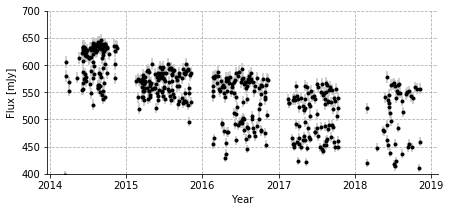

In [35]:
plt.figure(figsize=(7, 3))
plt.errorbar(times.decimalyear, fluxes, errors, fmt='.', color='k', ecolor='silver')
plt.ylabel('Flux [mJy]')
plt.xlabel('Year')
plt.ylim([400, 700])
ax = plt.gca()

for s in ['right', 'top']: 
    ax.spines[s].set_visible(False)
    
ax.grid(ls='--')
plt.savefig('plots/asas-sn.pdf', bbox_inches='tight')

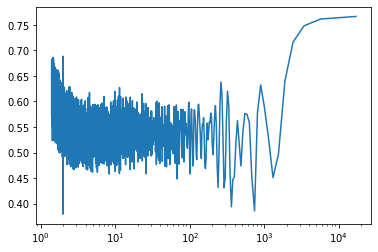

In [28]:
from astropy.timeseries import LombScargle
import astropy.units as u

ls = LombScargle(times, fluxes, errors)

freq, power = ls.autopower()
periods = (1/freq).to(u.day).value

plt.semilogx(periods, power)